In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

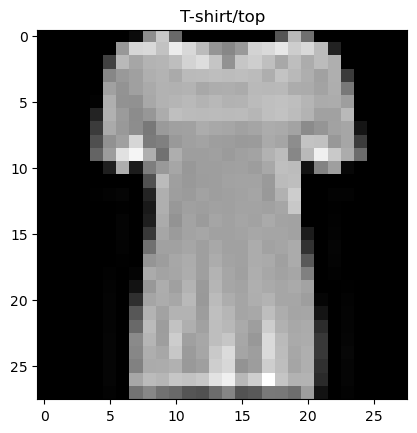

In [5]:
plt.imshow(x_train[10],cmap="gray")
plt.title(class_names[y_train[10]])
plt.show()

### Data Preparation

In [6]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [8]:
print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Model Building

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [39]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [40]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [41]:
model.fit(x=x_train,
          y=y_train_ohe,
          batch_size=1000,
          validation_data=(x_test, y_test_ohe),
          epochs=10)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.5312 - loss: 1.4961 - val_accuracy: 0.7643 - val_loss: 0.6162
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7830 - loss: 0.5822 - val_accuracy: 0.8270 - val_loss: 0.4770
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.8314 - loss: 0.4694 - val_accuracy: 0.8492 - val_loss: 0.4200
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.8562 - loss: 0.4009 - val_accuracy: 0.8665 - val_loss: 0.3781
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.8672 - loss: 0.3681 - val_accuracy: 0.8686 - val_loss: 0.3640
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.8769 - loss: 0.3404 - val_accuracy: 0.8750 - val_loss: 0.3422
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.8811 - loss: 0.3255 - val_accuracy: 0.8808 - val_loss: 0.3322
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.8850 - loss: 0.3116 - val_accur

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         288,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 950,420 (3.63 MB)

 Trainable params: 316,806 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 633,614 (2.42 MB)

In [43]:
preds = model.predict(x_test)
preds_class = np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [44]:
range(100, 110)

range(100, 110)

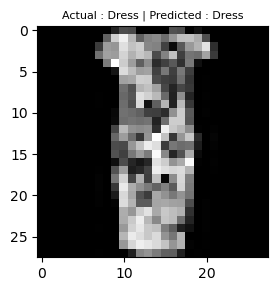

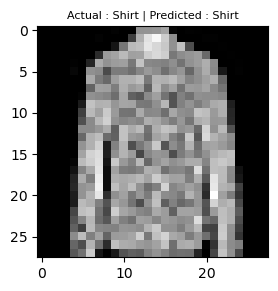

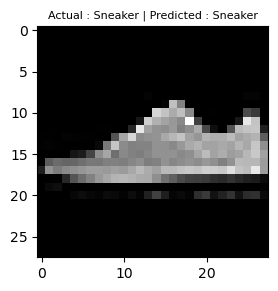

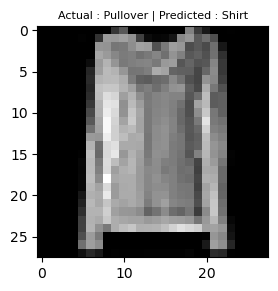

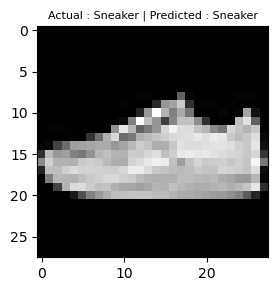

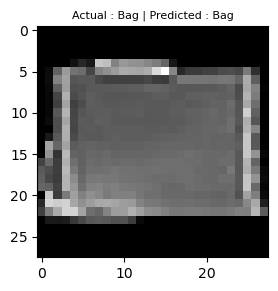

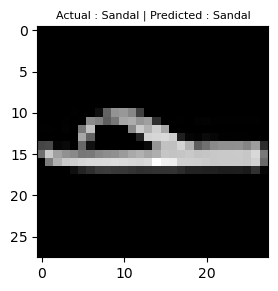

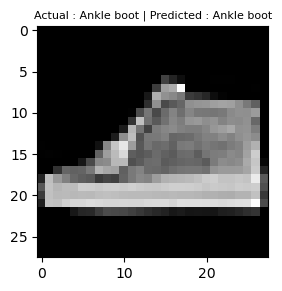

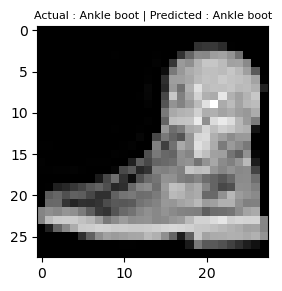

In [45]:
for n in range(100, 109):
    plt.figure(figsize=(3,3))
    plt.imshow(x_test[n].reshape(28,28), cmap="gray")
    plt.title(f"Actual : {class_names[y_test[n]]} | Predicted : {class_names[preds_class[n]]}",fontsize=8)
    plt.show()